# Análise de dados com Pandas e Seaborn

O Pandas é uma biblioteca Python de código aberto para análise de dados. Ela fornece ferramentas de análise de dados e estruturas de dados de alta performance e fáceis de usar. Já o Seaborn é uma biblioteca Python de visualização de dados baseada no matplotlib. Ela fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos. Sua vantagem sobre o Matplotlib puro é que Seaborn fornece padrões de plotagem estatística que podem ser facilmente ativados com apenas alguns comandos.

A base de dados utilizada aqui é de churn de clientes de uma empresa de telecomunicações. O churn é uma métrica que indica a taxa de evasão de clientes. Neste caso, o churn é definido como a perda de clientes para a concorrência ou por desinteresse em continuar com o serviço. O objetivo é analisar os dados e identificar os principais fatores que levam um cliente a cancelar o serviço.

Temos o seguinte dicionário de dados:

- `id_cliente`: identificador único do cliente
- `genero`: gênero do cliente
- `idoso`: indica se o cliente é idoso (mais de 65 anos) ou não
- `tem_parceiro`: indica se o cliente tem parceiro ou não
- `tem_dependentes`: indica se o cliente tem dependentes ou não
- `meses_na_empresa`: quantidade de meses que o cliente permaneceu na empresa
- `servico_telefone`: indica se o cliente tem serviço de telefone ou não
- `multiplas_linhas`: indica se o cliente tem múltiplas linhas ou não
- `servico_internet`: indica se o cliente tem serviço de internet (DSL ou fibra óptica) ou não
- `servico_seguranca`: indica se o cliente tem serviço de segurança online ou não
- `servico_backup`: indica se o cliente tem serviço de backup online ou não
- `servico_protecao_equipamento`: indica se o cliente tem serviço de proteção do equipamento de conexão ou não
- `servico_suporte_tecnico`: indica se o cliente tem serviço de suporte técnico prioritário ou não
- `streaming_tv`: indica se o cliente tem serviço de streaming de TV ou não
- `streaming_filmes`: indica se o cliente tem serviço de streaming de filmes ou não
- `contrato`: tipo de contrato do cliente (mensal, anual ou dois anos)
- `fatura_digital`: indica se o cliente recebe a fatura por e-mail ou não
- `forma_pagamento`: forma de pagamento do cliente (cheque, boleto, transferência bancária ou cartão de crédito)
- `valor_mensal`: valor mensal do serviço contratado
- `total_gasto`: valor total gasto pelo cliente
- `churn`: indica se o cliente cancelou o serviço no mês anterior ou não



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='dark', palette='bright', context='notebook')

ARQUIVO_DADOS = 'churn_clientes.csv'

df_churn = pd.read_csv(ARQUIVO_DADOS)
df_churn = df_churn.drop(columns='id_cliente', axis=1)


colunas_numericas = df_churn.select_dtypes(include='number').columns
colunas_categoricas = df_churn.select_dtypes(exclude='number').columns
colunas_categoricas = colunas_categoricas.drop('churn')

df_churn.head()

,genero,idoso,tem_parceiro,tem_dependentes,meses_na_empresa,servico_telefone,multiplas_linhas,servico_internet,servico_seguranca,servico_backup,servico_protecao_equipamento,servico_suporte_tecnico,streaming_tv,streaming_filmes,contrato,fatura_digital,forma_pagamento,valor_mensal,total_gasto,churn
0,Feminino,Não,Sim,Não,1,Não,Não,DSL,Não,Sim,Não,Não,Não,Não,Mensal,Sim,Boleto,29.85,29.85,Não
1,Masculino,Não,Não,Não,34,Sim,Não,DSL,Sim,Não,Sim,Não,Não,Não,Anual,Não,Cheque,56.95,1889.50,Não
2,Masculino,Não,Não,Não,2,Sim,Não,DSL,Sim,Sim,Não,Não,Não,Não,Mensal,Sim,Cheque,53.85,108.15,Sim
3,Masculino,Não,Não,Não,45,Não,Não,DSL,Sim,Não,Sim,Sim,Não,Não,Anual,Não,Transferencia,42.30,1840.75,Não
4,Feminino,Não,Não,Não,2,Sim,Não,Fibra optica,Não,Não,Não,Não,Não,Não,Mensal,Sim,Boleto,70.70,151.65,Sim


## Variáveis categóricas


In [2]:
print(colunas_categoricas)

Index(['genero', 'idoso', 'tem_parceiro', 'tem_dependentes',
       'servico_telefone', 'multiplas_linhas', 'servico_internet',
       'servico_seguranca', 'servico_backup', 'servico_protecao_equipamento',
       'servico_suporte_tecnico', 'streaming_tv', 'streaming_filmes',
       'contrato', 'fatura_digital', 'forma_pagamento'],
      dtype='object')


In [3]:
print(len(colunas_categoricas))

16


### Análise dos percentuais de churn por categoria

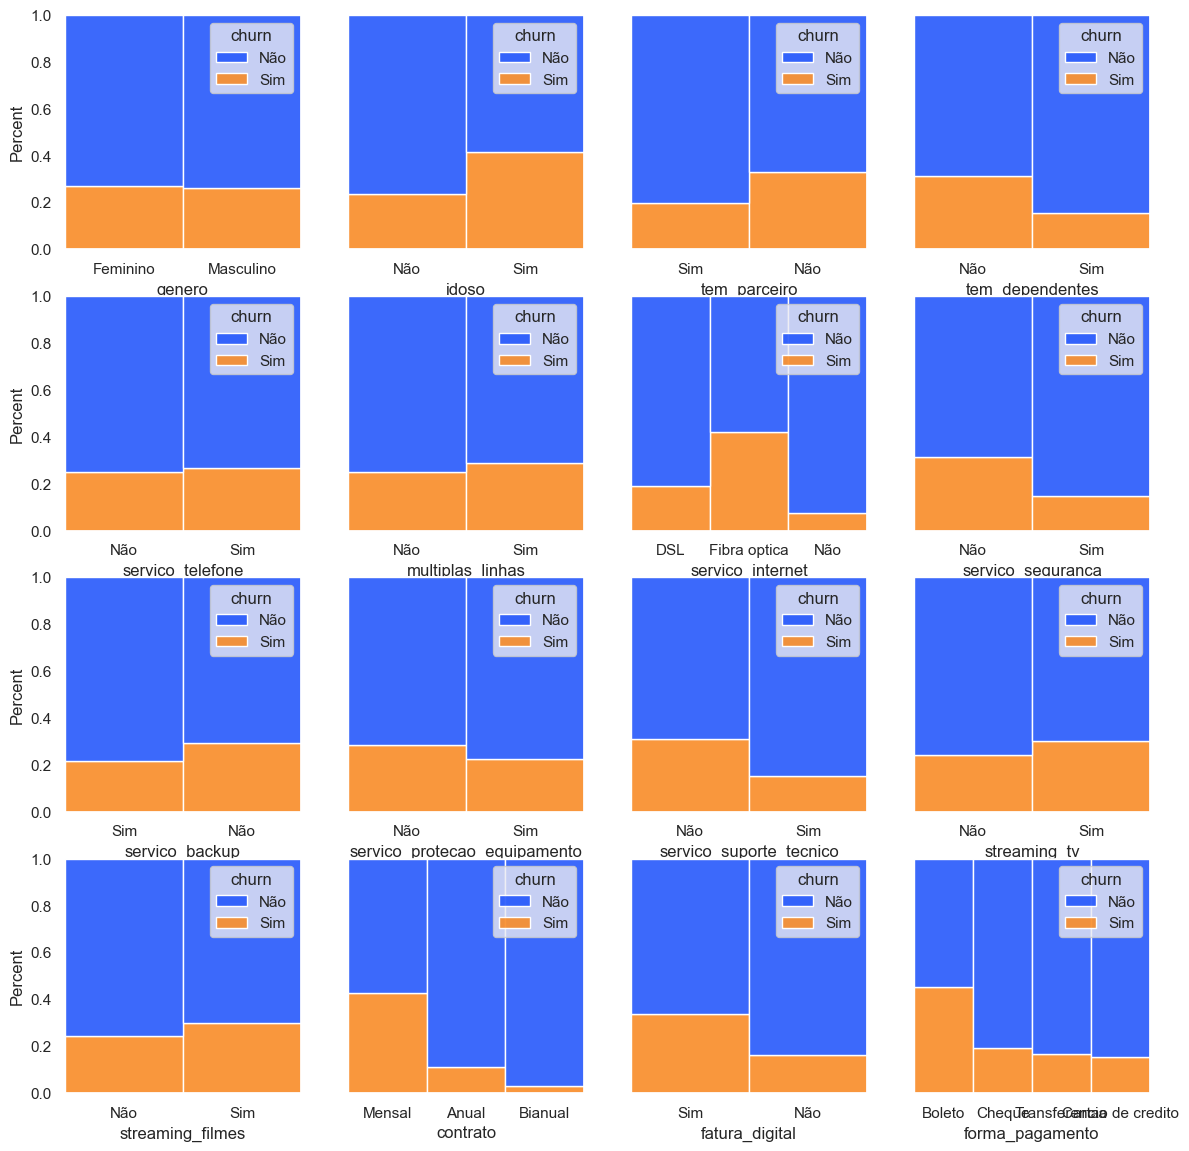

In [4]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(14, 14), sharey=True)

for i, coluna in enumerate(colunas_categoricas):
    h = sns.histplot(x=coluna, hue='churn', data=df_churn, multiple='fill', ax=axs.flat[i], stat='percent')

plt.show()

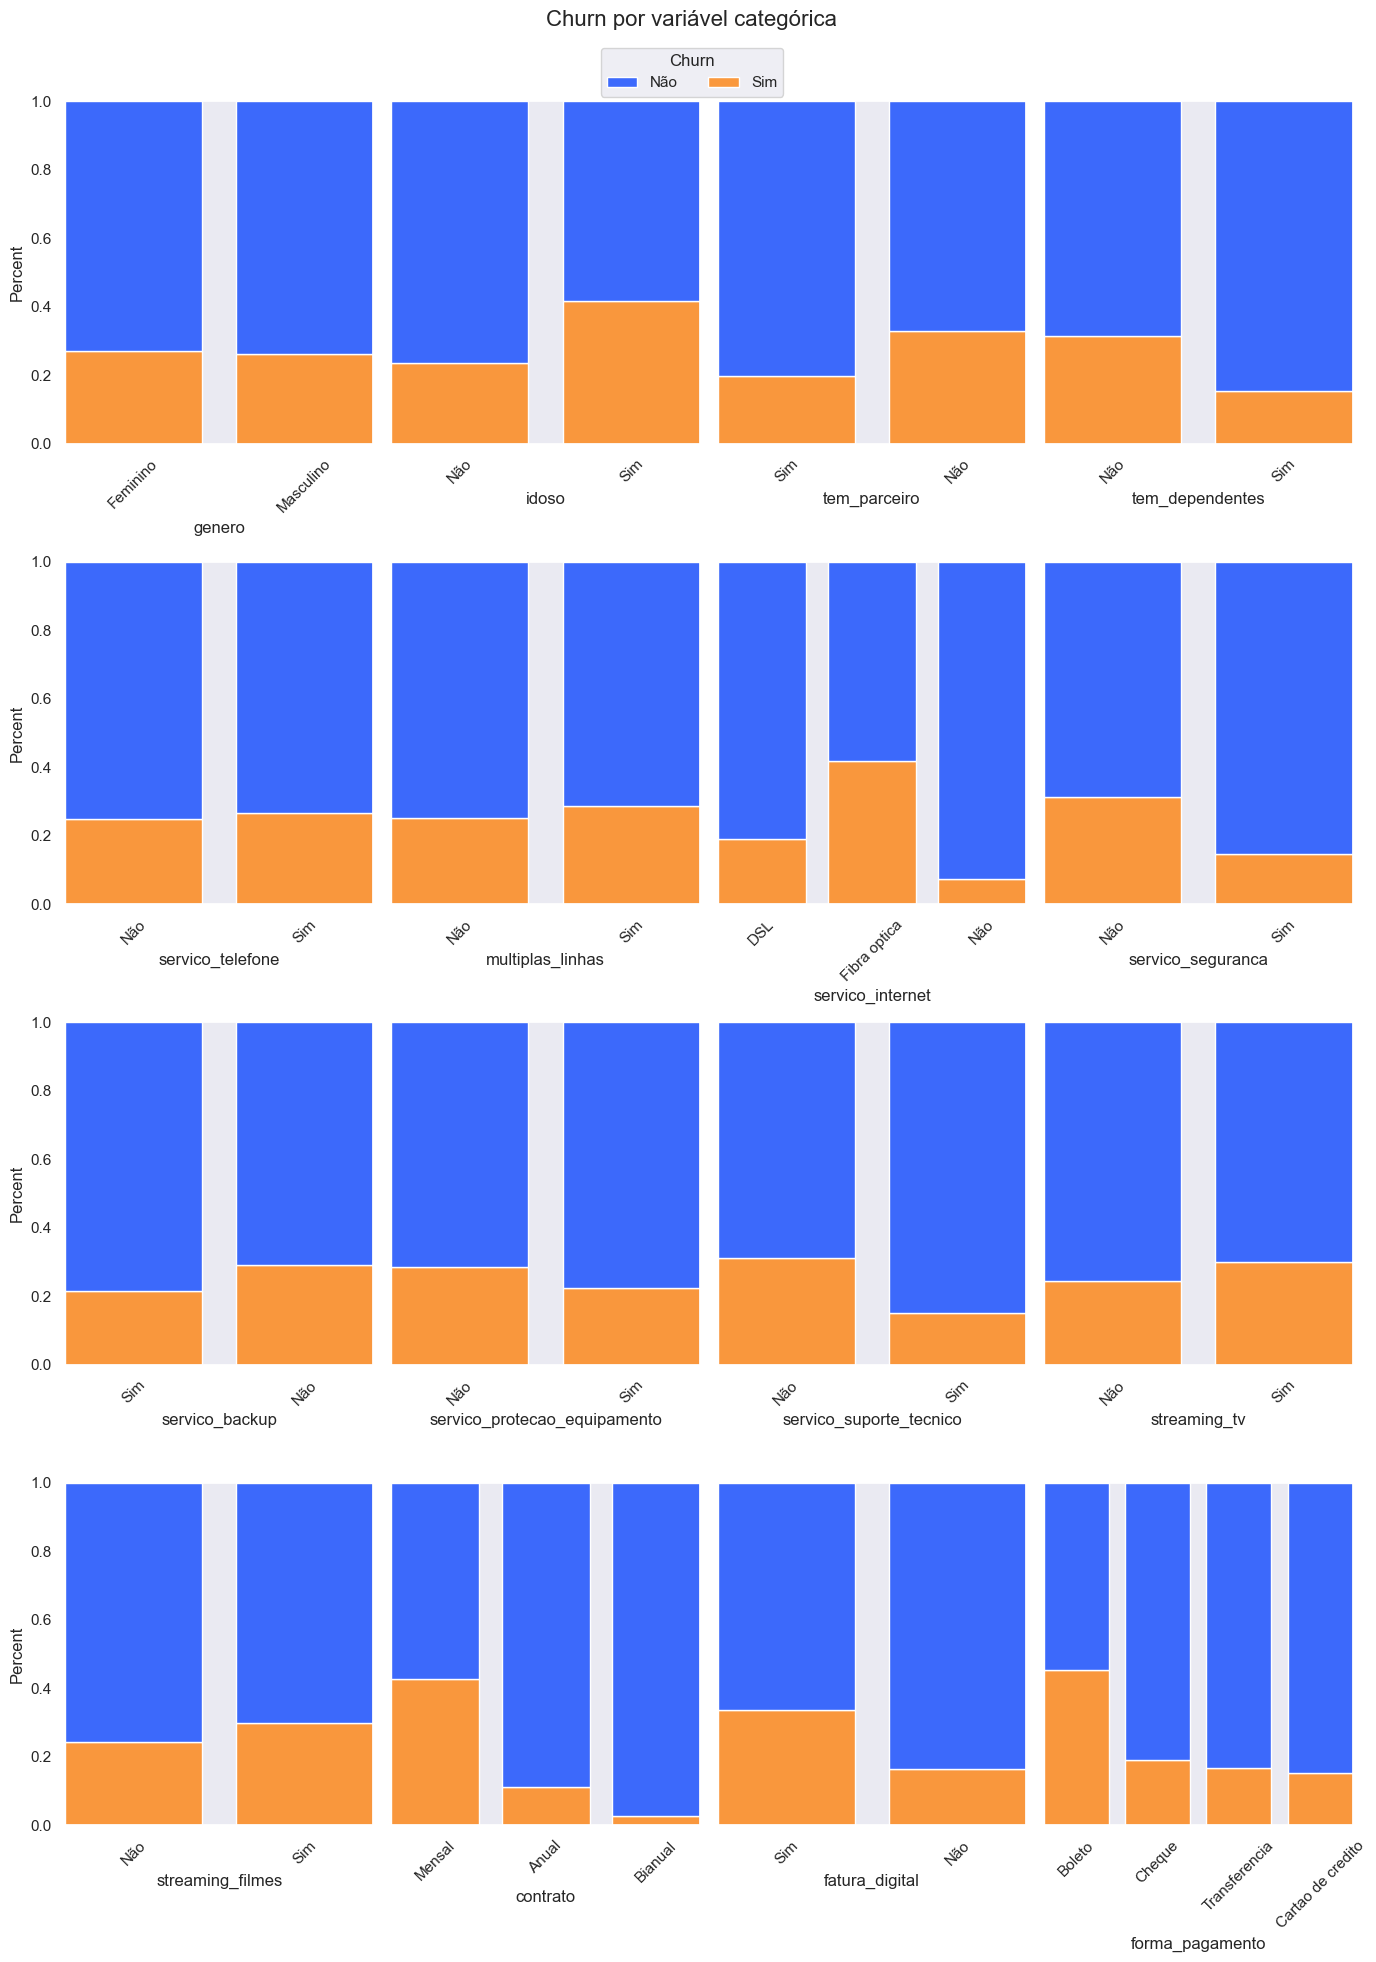

In [5]:

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(14, 20), sharey=True, tight_layout=True)

for i, coluna in enumerate(colunas_categoricas):
    h = sns.histplot(x=coluna, hue='churn', data=df_churn, multiple='fill', ax=axs.flat[i], stat='percent',
                     shrink=0.8, common_norm=True)
    h.tick_params(axis='x', labelrotation=45)

    legend = h.get_legend()
    legend.remove()

labels = [text.get_text() for text in legend.get_texts()]

fig.legend(handles=legend.legend_handles, labels=labels, loc='upper center', ncols=2, title='Churn', bbox_to_anchor=(0.5, 0.965))
fig.suptitle('Churn por variável categórica\n\n\n', fontsize=16)

# fig.align_labels()

plt.show()

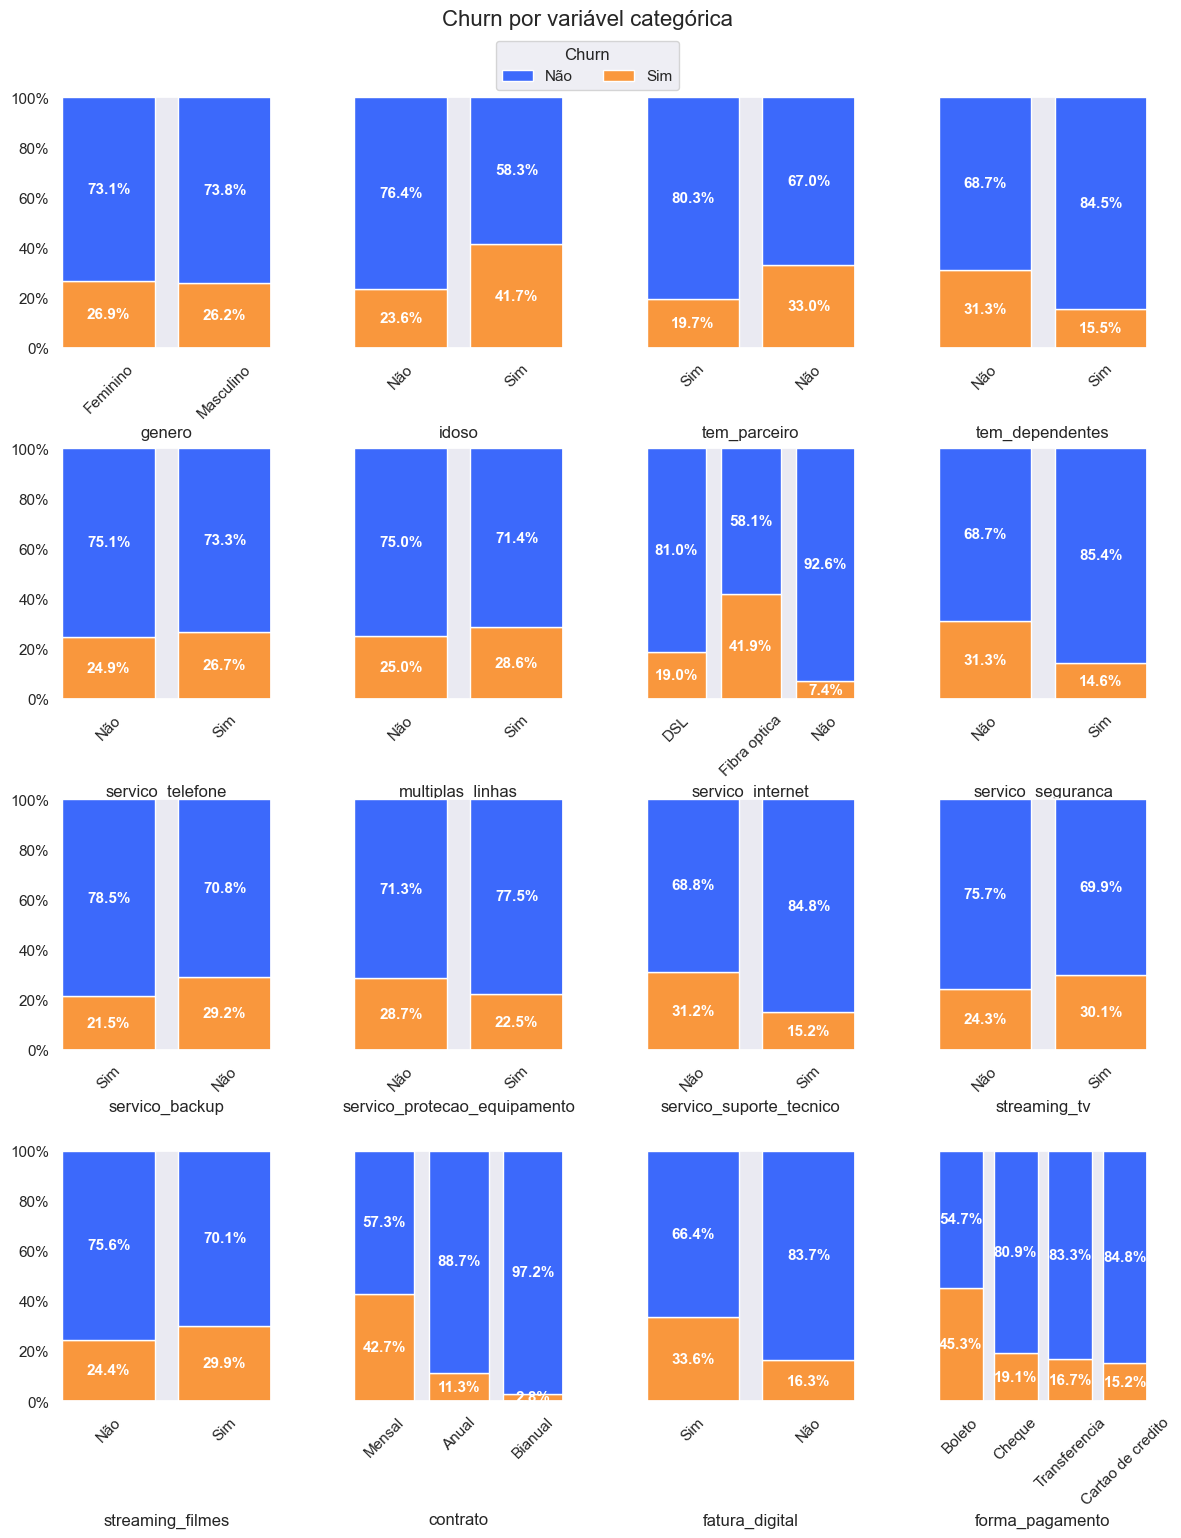

In [6]:
from matplotlib.ticker import PercentFormatter

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(14, 16), sharey=True)

for i, coluna in enumerate(colunas_categoricas):
    h = sns.histplot(x=coluna, hue='churn', data=df_churn, multiple='fill', ax=axs.flat[i], stat='percent',
                     shrink=0.8)
    h.tick_params(axis='x', labelrotation=45)
    h.grid(False)

    h.yaxis.set_major_formatter(PercentFormatter(1))
    h.set_ylabel('')

    for bar in h.containers:
        h.bar_label(bar, label_type='center', labels=[f'{b.get_height():.1%}' for b in bar], color='white', weight='bold', fontsize=11)

    legend = h.get_legend()
    legend.remove()

labels = [text.get_text() for text in legend.get_texts()]

fig.legend(handles=legend.legend_handles, labels=labels, loc='upper center', ncols=2, title='Churn', bbox_to_anchor=(0.5, 0.965))
fig.suptitle('Churn por variável categórica', fontsize=16)

fig.align_labels()

plt.subplots_adjust(wspace=0.4, hspace=0.4, top=0.925)

plt.show()

Recursos que parecem estar positivamente correlacionados com a rotatividade:

- contratos mensais
- ausência de backup online, segurança online e serviços de proteção de dispositivos
- ausência de suporte técnico
- ser um idoso
- fatura digital
- pagar com boleto
- serviço de internet por fibra óptica

Recursos que parecem estar negativamente correlacionados com a rotatividade:

- contratos de dois anos
- ausência de serviço de internet
- ter um parceiro ou dependente

Vamos quantificar essas correlações em breve. Primeiro, vamos tentar interpretar os resultados.

Ambos os sexos se comportam de maneira semelhante quando se trata de migrar para outro provedor de serviços.

Talvez o serviço de internet fornecido pela empresa tenha problemas de conectividade, particularmente o de fibra óptica. Também pode ser que a configuração não seja fácil, de modo que aqueles que optaram por não ter suporte técnico possam não conseguir usar os serviços. E isso seria mais grave em clientes idosos. Embora pareça que existam problemas com a internet de fibra óptica, a DSL tem uma taxa de rotatividade muito menor, apesar de ser uma conexão mais lenta.

Vamos detalhar a análise do serviço de internet. Abaixo, o boxplot considerando o valor mensal e o churn.

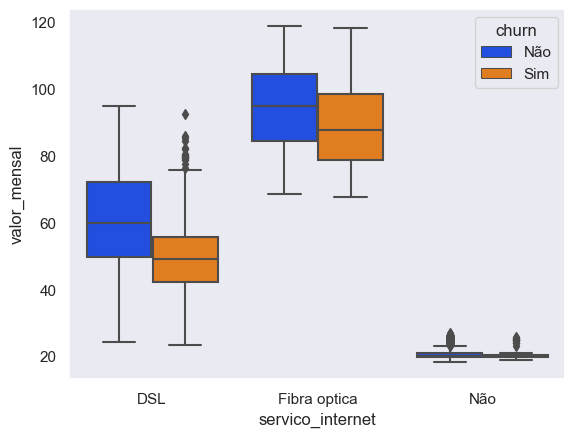

In [7]:
sns.boxplot(x='servico_internet', y='valor_mensal', hue='churn', data=df_churn); 